In [1]:
import spacy
from spacy import displacy

import en_core_web_sm

import pandas as pd

from pathlib import Path

from nltk.tokenize import sent_tokenize

import re

import numpy as np


In [17]:
# load file to update
file_v = "validation dataset/validation_info_init.csv"
file_o = "organization dataset/organization_info.csv"
file_u = "utility dataset/utility_info.csv"
sheet_v = pd.read_csv(file_v, encoding = "ISO-8859-1")
sheet_o = pd.read_csv(file_o)
sheet_u = pd.read_csv(file_u)
nlp = en_core_web_sm.load()

In [18]:
descriptions_v = sheet_v['Description']
descriptions_o = sheet_o['Description']
descriptions_u = sheet_u['Description']

In [5]:
def newDescriptions(descriptions):
    newDescr=[]
    for d in descriptions: 
        try:
            new_d = stripPunct(d)
            if isVerb(d):
                x = "This repository " + str(new_d)
            else:
                x = "This repository contains " + str(new_d)
        except:
            x = ""
        newDescr.append(x)
    return newDescr

In [6]:
def isVerb(description):
    doc = nlp(description)
    
    if doc[0].pos_ == 'VERB':
        return True
    else:
        return False

In [19]:
newD_v = newDescriptions(descriptions_v)
newD_o = newDescriptions(descriptions_o)
newD_u = newDescriptions(descriptions_u)

In [20]:
df_newDescr_v = pd.DataFrame(newD_v)
df_newDescr_o = pd.DataFrame(newD_o)
df_newDescr_u = pd.DataFrame(newD_u)

In [7]:
def getTree(text):

    df_tree = pd.DataFrame(columns=['Text','Dep','Head Text','Head Pos','Children'])

    if type(text) is str:
        doc = nlp(text)
        for token in doc:

            df_tree = df_tree.append({'Text':token.text, 'Dep':token.dep_, 'Head Text':token.head.text,
                           'Head Pos':token.head.pos_, 'Children':[child for child in token.children]}, ignore_index=True)

    return df_tree


def getAllTrees(texts):
    trees = []
    for text in texts:
        trees.append(getTree(text))
        
    return trees



In [21]:
trees_v = getAllTrees(newD_v)
trees_o = getAllTrees(newD_o)
trees_u = getAllTrees(newD_u)

In [11]:
# take first 80 descriptions
# remove stop words
# stem words (or lematize ... figure out which is better)
# import the purpose from the correct sheet
# stem or lematize
# match individual words in description to purpose and save dep, head text, pos for properly matched words

# next look at intro paragraph of readme to do the same.

# alternatively, for the properly id'd words ---> get first sentence from wikipedia for background (?)

In [12]:
# strip punctuation

In [13]:
# define punctuation
punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''

def stripPunct(my_str):


    # To take input from the user
    # my_str = input("Enter a string: ")

    # remove punctuation from the string
    no_punct = ""
    for char in my_str:
        if char not in punctuations:
            no_punct = no_punct + char
        else:
            no_punct = no_punct + " "
    return no_punct

In [14]:
def incrementOccurance(index, occurances):
    occurances[index]+=1
    
def singleTreeOccurance(tree, list_of_universal_dependencies, occurances):
    for d in tree['Dep']:
        try:
            index=list_of_universal_dependencies.index(d)
        except:
            list_of_universal_dependencies.append(d)
            index = list_of_universal_dependencies.index(d)
            
       
        incrementOccurance(index, occurances)
        
        
def allTreeOccurances(treesAll, list_of_universal_dependencies, occurances):
    for tree in treesAll:
        singleTreeOccurance(tree, list_of_universal_dependencies, occurances)
        
        


In [27]:
# for validation

occurances_v=np.zeros((34,1))
list_of_universal_dependencies_v=[]
example_dependencies_v=['None']*34
tree_occurance_v = allTreeOccurances(trees_v, list_of_universal_dependencies_v, occurances_v)

# for utility

occurances_u=np.zeros((37,1))
list_of_universal_dependencies_u=[]
example_dependencies_u=['None']*37
tree_occurance_u = allTreeOccurances(trees_u, list_of_universal_dependencies_u, occurances_u)

# for organization

occurances_o=np.zeros((36,1))
list_of_universal_dependencies_o=[]
example_dependencies_o=['None']*36
tree_occurance_o = allTreeOccurances(trees_o, list_of_universal_dependencies_o, occurances_o)

In [28]:
it_v = 0
for i in occurances_v:
    
    #print(i, list_of_universal_dependencies[it], spacy.explain(list_of_universal_dependencies[it]))
    it_v+=1
    
o_v = []    
for i in occurances_v:
    o_v.append(int(i))
    
print(len(list_of_universal_dependencies_v))




#######################
it_u = 0
for i in occurances_u:
    
    #print(i, list_of_universal_dependencies[it], spacy.explain(list_of_universal_dependencies[it]))
    it_u+=1
    
o_u = []    
for i in occurances_u:
    o_u.append(int(i))
    
print(len(list_of_universal_dependencies_u))





#######################
it_o = 0
for i in occurances_o:
    
    #print(i, list_of_universal_dependencies[it], spacy.explain(list_of_universal_dependencies[it]))
    it_o+=1
    
o_o = []    
for i in occurances_o:
    o_o.append(int(i))
    
print(len(list_of_universal_dependencies_o))

34
37
36


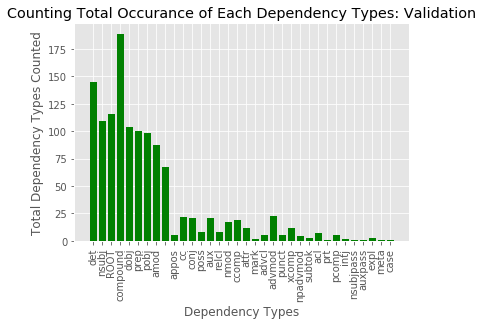

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')




### for validation
x = list_of_universal_dependencies_v
energy = o_v

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, energy, color='green')
plt.xlabel("Dependency Types")
plt.ylabel("Total Dependency Types Counted")
plt.title("Counting Total Occurance of Each Dependency Types: Validation")

plt.xticks(x_pos, x, rotation='vertical')

plt.show()


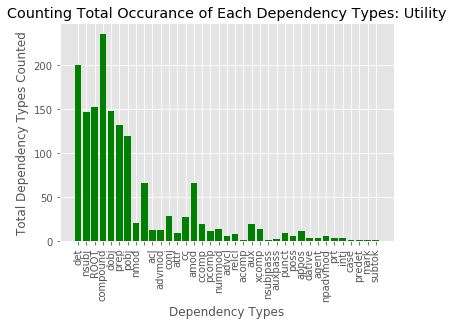

In [31]:
### for utility
x = list_of_universal_dependencies_u
energy = o_u

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, energy, color='green')
plt.xlabel("Dependency Types")
plt.ylabel("Total Dependency Types Counted")
plt.title("Counting Total Occurance of Each Dependency Types: Utility")

plt.xticks(x_pos, x, rotation='vertical')

plt.show()


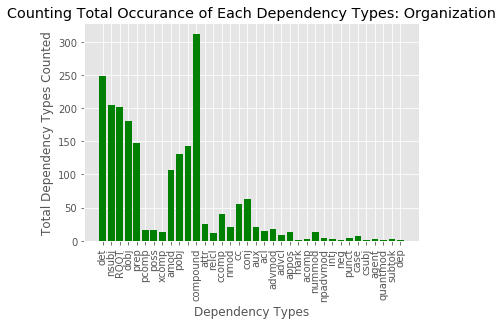

In [32]:
### for organization
x = list_of_universal_dependencies_o
energy = o_o

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, energy, color='green')
plt.xlabel("Dependency Types")
plt.ylabel("Total Dependency Types Counted")
plt.title("Counting Total Occurance of Each Dependency Types: Organization")

plt.xticks(x_pos, x, rotation='vertical')

plt.show()
